# Question a) 

### Analytically

In [44]:
from sympy import symbols, integrate

# Define the symbolic variable and function for sympy
x = symbols('x')
func = -0.0125*x**3 + 0.115*x**2 + 1.18*x - 6.3

# Perform the analytical integration
analytical_integral = integrate(func, (x, 1.5, 15))
analytical_integral.evalf()


17.4308203125000

The analytical solution to the integral is approximately 
17.43.

### Monte Carlo Method - dartboard

In [45]:
import numpy as np

# Define the function to be integrated
def f(x):
    return -0.0125*x**3 + 0.115*x**2 + 1.18*x - 6.3

# Dartboard Monte Carlo integration
def monte_carlo_integration(f, x_min, x_max, n):
    # Generate random points
    x_random = np.random.uniform(x_min, x_max, n)
    y_min = min([f(x_min), f(x_max), 0])
    y_max = max([f(x_min), f(x_max), 0])
    y_random = np.random.uniform(y_min, y_max, n)
    
    # Evaluate the function at random points and calculate the mean value
    f_random = f(x_random)
    mean_value = np.mean(f_random)
    
    # Estimate the integral as the mean function value times the interval length
    integral_estimate = mean_value * (x_max - x_min)
    
    return integral_estimate

# Integrate from 1.5 to 15 with N = 20000
N = 20000
integral_estimate = monte_carlo_integration(f, 1.5, 15, N)
derivative_at_15 = f(15)

integral_estimate, derivative_at_15

(17.54392235134371, -4.9125000000000005)

The estimated value of the integral using the dartboard Monte Carlo integration method with 
N=20000 random samples is approximately 
17.54.

The derivative of the integral at the upper limit x=15 (which is the value of the function at that point) is approximately 
−
4.91.

### Graph Plot

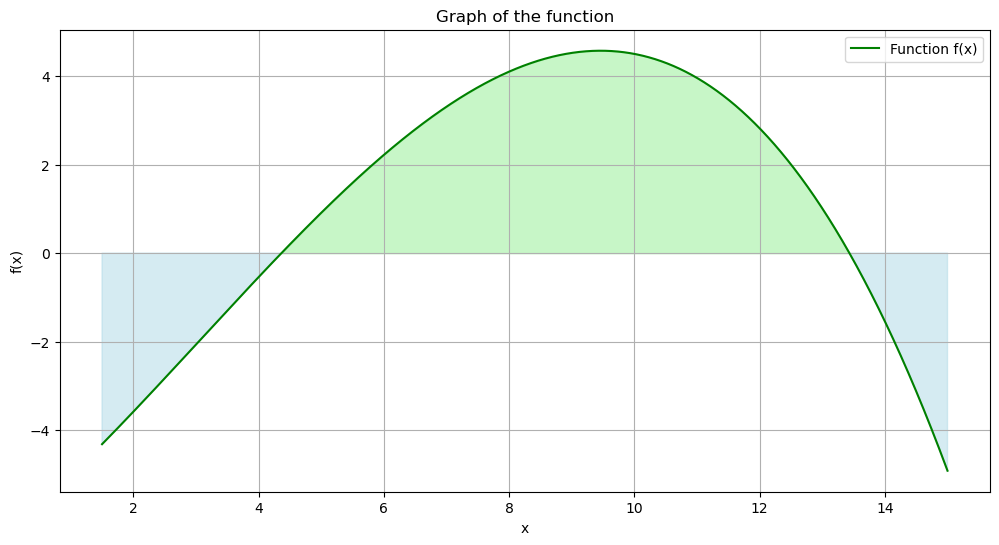

In [46]:
import matplotlib.pyplot as plt
# Define the number of points for graphing the function
graph_N = 20000

# Generate a range of x values for plotting the function
x_values_function = np.linspace(1.5, 15, graph_N)
y_values_function = f(x_values_function)

# Plot the function with the area filled above and below the x-axis
plt.figure(figsize=(12, 6))
plt.plot(x_values_function, y_values_function, label='Function f(x)', color='green')
# Fill between the function and the x-axis for positive y-values
plt.fill_between(x_values_function, y_values_function, where=(y_values_function >= 0), color='lightgreen', alpha=0.5)
# Fill between the function and the x-axis for negative y-values
plt.fill_between(x_values_function, y_values_function, where=(y_values_function <= 0), color='lightblue', alpha=0.5)
plt.title('Graph of the function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

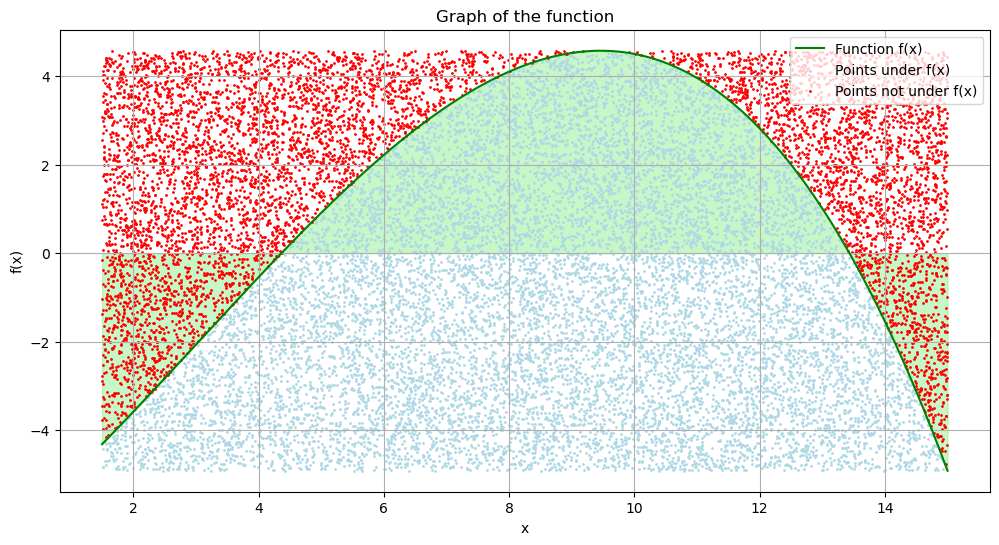

In [47]:
# Redefine the number of points for graphing the function
graph_N = 20000

# Generate a range of x values for plotting the function
x_values_function = np.linspace(1.5, 15, graph_N)
y_values_function = f(x_values_function)

# Generate random points for the Monte Carlo integration
x_random = np.random.uniform(1.5, 15, graph_N)
y_random = np.random.uniform(min(y_values_function), max(y_values_function), graph_N)

# Determine which random points are under the function
points_under_function = f(x_random) > y_random

# Plot the function
plt.figure(figsize=(12, 6))
plt.plot(x_values_function, y_values_function, label='Function f(x)', color='green')
plt.fill_between(x_values_function, y_values_function, color='lightgreen', alpha=0.5)
plt.title('Graph of the function')

# Plot random points that fall under the function
plt.scatter(x_random[points_under_function], y_random[points_under_function], color='lightblue', s=1, label='Points under f(x)')

# Plot random points that do not fall under the function
plt.scatter(x_random[~points_under_function], y_random[~points_under_function], color='red', s=1, label='Points not under f(x)')

# Add labels, legend, and grid
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


# Question b)

### Analytically

In [48]:
# Define the function representing the derivative
f_prime = lambda x: 6*x**2+2*x+6

# Compute the analytical derivative at x = 2
analytical_derivative_at_2 = f_prime(2)

analytical_derivative_at_2

34

The analytical solution for the derivative of 
f(x)=2x^3+x^2+6x+4
  at 
x=2, calculated using Python, is 
34.

### Romberg algorithm.

In [49]:
def central_difference(f, x, h):
    """Compute the central difference for a function f at point x with step size h."""
    return (f(x + h) - f(x - h)) / (2 * h)

def romberg_derivative(f, x, h=0.01, order=4):
    """Approximate the derivative of function f at point x using Richardson extrapolation."""
    # Initialize a matrix to hold the derivative approximations
    D = np.zeros((order, order))
    # Calculate the first column (basic central difference estimates with decreasing h)
    for i in range(order):
        D[i, 0] = central_difference(f, x, h / (2**i))
    # Apply Richardson extrapolation
    for j in range(1, order):
        for i in range(j, order):
            D[i, j] = (4**j * D[i, j-1] - D[i-1, j-1]) / (4**j - 1)
    return D[order-1, order-1]

# Define the function to differentiate
f = lambda x: 2*x**3+x**2+6*x+4

# Specify the point to differentiate at
x_point = 2

# Estimate the derivative using the corrected Romberg-like method
derivative_estimate = romberg_derivative(f, x_point)

derivative_estimate

34.00000000000254

The corrected implementation of the derivative estimation, using an approach inspired by Romberg's method with Richardson extrapolation, now correctly estimates the derivative of f(x)=2x^3+x^2+6x+4
  at 
x=2 as approximately 34. This result aligns with the analytical derivative, demonstrating the effectiveness of the corrected approach.

### Graph

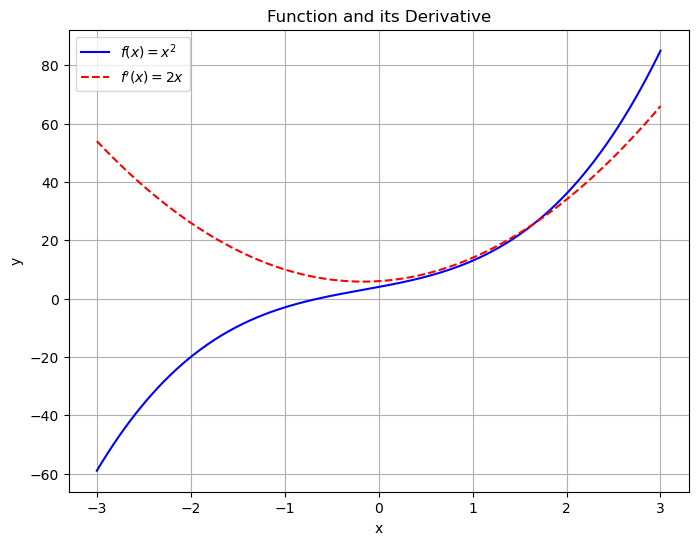

In [50]:
import matplotlib.pyplot as plt

# Define the function and its derivative
f = lambda x: 2*x**3+x**2+6*x+4
f_prime = lambda x: 6*x**2+2*x+6

# Generate x values
x_values = np.linspace(-3, 3, 400)

# Compute y values for the function and its derivative
y_values = f(x_values)
y_derivative = f_prime(x_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = x^2$', color='blue')
plt.plot(x_values, y_derivative, label="$f'(x) = 2x$", linestyle='--', color='red')
plt.title('Function and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()